<a href="https://colab.research.google.com/github/Nyauntu/Amazon_externship/blob/main/Copy_of_Key_word_analysis_glassdoor_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
from wordcloud import WordCloud

df = pd.read_csv("/content/sample_data/final_glassdoor_cleaned.csv")


In [ ]:
# Combining all cleaned text columns into one column
df['cleaned_text'] = df[['summary_cleaned', 'pros_cleaned', 'cons_cleaned', 'advice_to_management_cleaned']] \
    .fillna('') \
    .agg(' '.join, axis=1)


In [ ]:
# Step 1: Tokenizing all words from the cleaned_text column
all_words = ' '.join(df['cleaned_text']).split()

# Filtering out unwanted words
stop_keywords = ['team', 'company', 'job', 'work', 'amazon', 'warehouse','get','associate']
filtered_words = [word for word in all_words if word not in stop_keywords]

# Count how often each filtered word appears
word_counts = Counter(filtered_words)

# View top 10 most common filtered words
print(word_counts.most_common(10))


[('good', 83), ('pay', 59), ('benefits', 45), ('great', 30), ('people', 28), ('time', 25), ('environment', 25), ('hours', 23), ('management', 20), ('place', 20)]


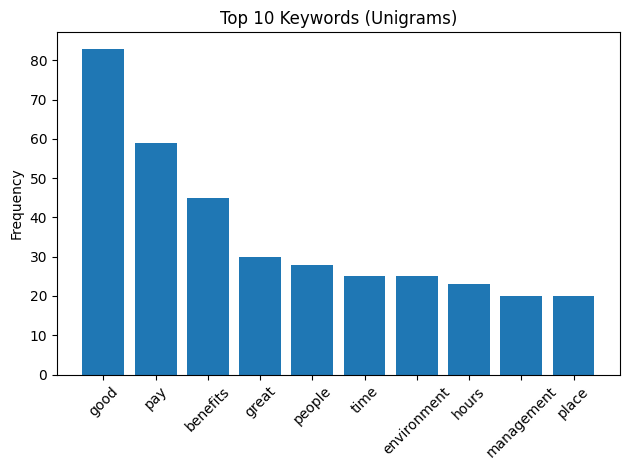

In [ ]:
# Getting top 10 most common words (after filtering)
most_common = word_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Creating bigrams and trigrams from filtered words
bigrams = list(ngrams(filtered_words, 2))
trigrams = list(ngrams(filtered_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

print("Top 5 bigrams:", bigram_counts.most_common(5))
print("Top 5 trigrams:", trigram_counts.most_common(5))



Top 5 bigrams: [(('good', 'pay'), 17), (('good', 'benefits'), 12), (('good', 'place'), 9), (('pay', 'benefits'), 8), (('good', 'good'), 7)]
Top 5 trigrams: [(('competitive', 'pay', 'benefits'), 3), (('use', 'break', 'time'), 3), (('good', 'pay', 'rate'), 2), (('pay', 'rate', 'good'), 2), (('good', 'good', 'pay'), 2)]


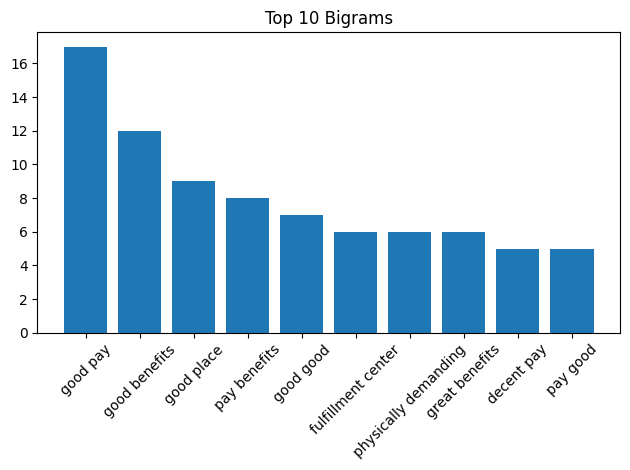

In [ ]:
# Getting the top bigrams
common_bigrams = bigram_counts.most_common(10)
bg_labels = [' '.join(bg) for bg, count in common_bigrams]
bg_counts = [count for bg, count in common_bigrams]

plt.bar(bg_labels, bg_counts)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


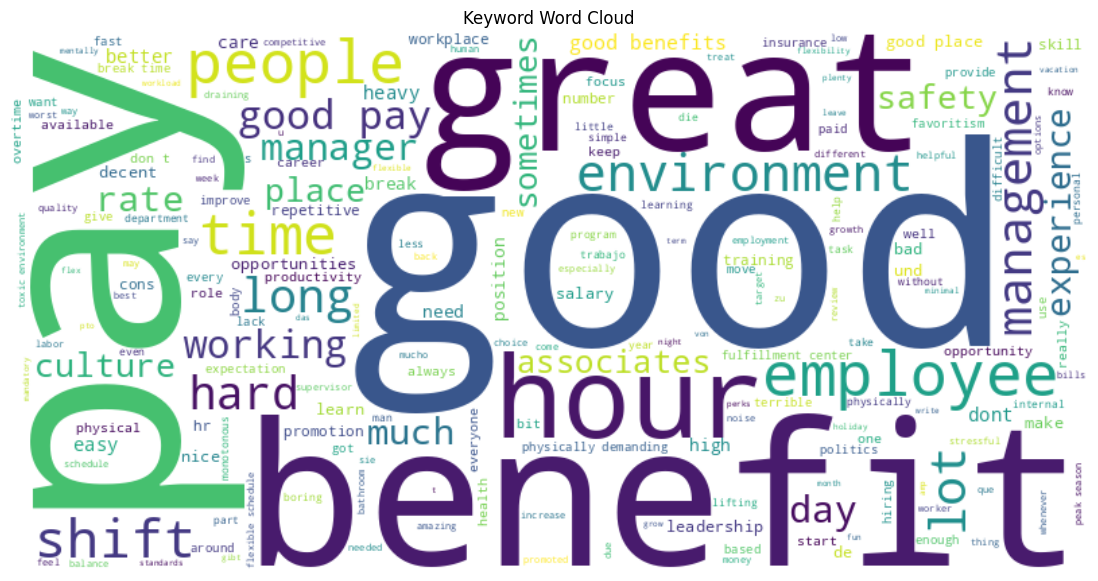

In [ ]:
# Creating word cloud from filtered words
wordcloud = WordCloud(width=800, height=400, background_color='white') \
    .generate(' '.join(filtered_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()

